In [84]:
import altair as alt

In [85]:
import pandas as pd
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [86]:
brain_body = pd.read_csv("data/brain.csv")

In [87]:
brain_body.head()

,Index,Brain Weight,Body Weight
0,1,3.385,44.5
1,2,0.480,15.5
2,3,1.350,8.1
3,4,465.000,423.0
4,5,36.330,119.5


In [88]:
brain_body.columns

Index(['Index', 'Brain Weight', 'Body Weight'], dtype='object')

In [89]:
histo_brain=alt.Chart(brain_body).mark_bar().encode(
    x=alt.X('Brain Weight',bin=alt.Bin(maxbins=20)),
    y="count()"
)

In [90]:
histo_body = alt.Chart(brain_body).mark_bar().encode(
    x=alt.X('Body Weight',bin=True),
    y="count()"
)

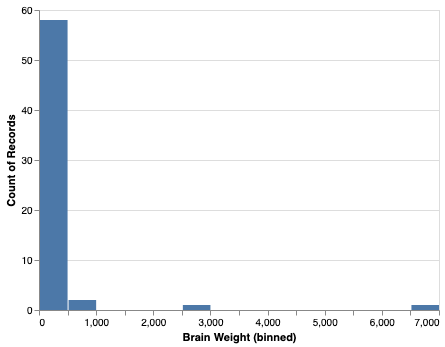

In [91]:
histo_brain

In [92]:
scatter_body_brain=alt.Chart(brain_body).mark_circle().encode(
    x='Brain Weight',
    y='Body Weight',
    color=alt.value("#123456")
).properties(
    width=800
)

In [93]:
((histo_body|histo_brain)&scatter_body_brain).save("data/brain_dash.html")

In [94]:
# Google Trends

In [95]:
trends = pd.read_csv("data/google_trends.csv")

In [96]:
trends.head()

,date,search_term,value
0,2004-01,SPSS data,6
1,2004-02,SPSS data,8
2,2004-03,SPSS data,7
3,2004-04,SPSS data,7
4,2004-05,SPSS data,6


In [97]:
line_trends=alt.Chart(trends).mark_line().encode(
    x=alt.X("date:T",timeUnit="year"),
    y="mean(value)",
    color="search_term"
)

In [98]:
trends.columns

Index(['date', 'search_term', 'value'], dtype='object')

In [99]:
bar_trends=alt.Chart(trends).mark_bar().encode(
    x='search_term',
    y='mean(value)',
    color='search_term'
)

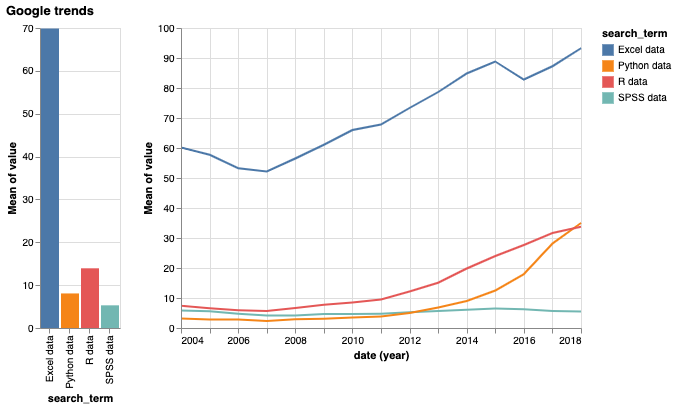

In [100]:
(bar_trends|line_trends).properties(
    title="Google trends"
)

In [101]:
select_term = alt.selection_single(encodings=["x"])

line_trends=alt.Chart(trends).mark_line().encode(
    x=alt.X("date:T",timeUnit="year"),
    y="mean(value)",
    color="search_term"
).transform_filter(select_term)

bar_trends=alt.Chart(trends).mark_bar().encode(
    x='search_term',
    y='mean(value)',
    color='search_term'
).properties(
    selection=select_term
)

(bar_trends|line_trends).save("selector.html")

In [102]:
select_zoom = alt.selection_interval(encodings=["x"])

line_trends = alt.Chart(trends).mark_line().encode(
    x=alt.X("date:T",timeUnit="yearmonth"),
    y="mean(value)",
    color="search_term"
).properties(
    height=200
).transform_filter(
    select_zoom
)

line_trends_small = alt.Chart(trends).mark_line().encode(
    x=alt.X("date:T",timeUnit="yearmonth"),
    y="mean(value)",
    color="search_term"
).properties(
    height=50,
    selection=select_zoom
)

(line_trends&line_trends_small).save("zoom.html")

In [103]:
# lifecountries

In [104]:
# Step 1: Cargais lifecountries
# Step 2: Visualizacion lifecountries

In [105]:
life_countries = pd.read_csv("data/lifecountries.csv")

In [106]:
life_countries.columns

Index(['Unnamed: 0', 'Country GDP', 'Life Expectancy', 'Description', 'size',
       'Continent', 'country'],
      dtype='object')

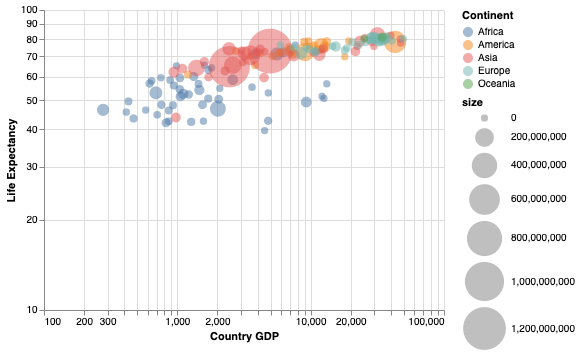

In [107]:
alt.Chart(life_countries).mark_circle().encode(
    x=alt.X('Country GDP',scale=alt.Scale(type="log",zero=False)),
    y=alt.Y('Life Expectancy',scale=alt.Scale(type="log",zero=False,domain=(40,100))),
    size=alt.Size('size',scale=alt.Scale( range=(50,2000))),  
  color='Continent',
  tooltip="Description",
  opacity=alt.value(.5)
)